In [1]:
import numpy as np
import functions_Full
import importlib
importlib.reload(functions_Full)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#plotting options
blue = sns.color_palette()[0]
red = sns.color_palette()[1]
green = sns.color_palette()[2]
yellow = sns.color_palette()[4]
black = sns.color_palette()[7]

# Seed for reproduceability
np.random.seed(1234)

In [3]:
D = 0.05        # 1/hr  # Dilution Rate
S_0 = 20.0      # g/L   # Inlet Nutrient Concentration
Y_X = 0.435     # 1     # Biomass Yield Coefficient
Y_A = 0.607     # 1     # Species A Yield Coefficient
Y_B = 0.3       # 1     # Species B Yield Coefficient
mu_0 = 0.22     # 1/hr  # Nominal Specific Growth Rate
K_S = 1.03      # g/L   # Monod Constant for Growth
K_A = 7.12      # g/L   # Species A Growth Inhibition Constant
K_B = 0.712     # g/L   # Species B Growth Inhibition Constant
K_EB = 0.5      # g/L   # Enzyme B Growth Inhibition Constant
R_A1 = 0        # 1/hr  # Minimum Enzyme A Production Rate
R_A2 = 1.79     # 1/hr  # Maximum Enzyme A Production Rate
K_SA = 1.68     # g/L   # Monod Constant for Production of A
K_AA = 14.0     # g/L   # Inhibition Constant for Production o A
R_B1 = 0.0985   # 1/hr  # Minimum Enzyme B Production Rate
R_B2 = 0.448    # 1/hr  # Maximum Enzyme B Production Rate
K_SB = 1.68     # g/L   # Monod Constant for Production of B
K_BB = 14.0     # g/L   # Inhibition Constant for Production of B
tau_1 = 5       # hr    # Time Constant for Enzyme A
tau_2 = 6.0     # hr    # Time Constant for Enzyme B
tau_3 = 1.0     # hr    # Time Constant for mRNA A
tau_4 = 1.0     # hr    # Time Constant for mRNA B
N_A = 2.7       # 1     # Hill Exponent for Species A
N_B = 2.3       # 1     # Hill Exponent for Species B
K_HA = 0.08     # 1     # Half Saturation Constant for Species A
K_HB = 0.30     # 1     # Half Saturation Constant for Species B


par = D, S_0, Y_X, Y_A, Y_B, mu_0, K_S, K_A, K_B, K_EB, R_A1,\
      R_A2, K_SA, K_AA, R_B1, R_B2, K_SB, K_BB, tau_1, tau_2, \
      tau_3, tau_4, N_A, N_B, K_HA, K_HB


In [4]:
importlib.reload(functions_Full)
steps = 160
t_step = 24
t_points = 24

t, X, A, B, S, E_A, E_B, R_A, R_B, u = \
    functions_Full.ODE_int(steps, t_step, t_points, par)

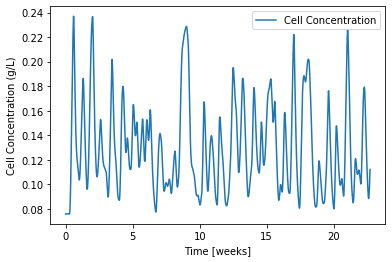

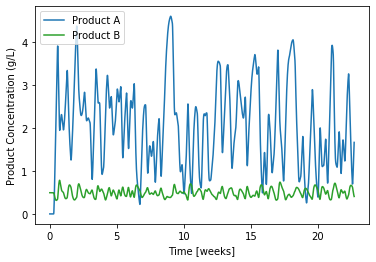

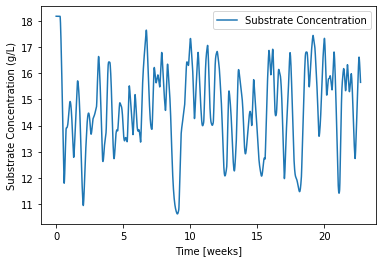

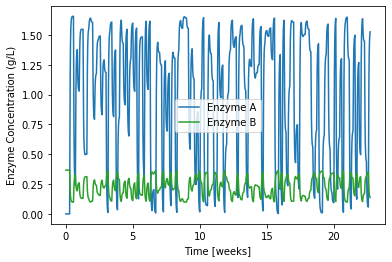

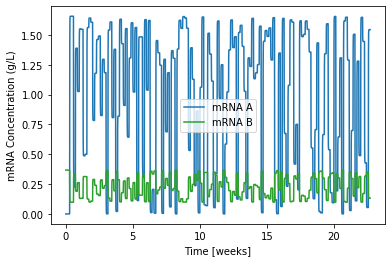

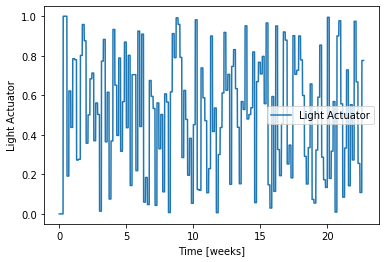

In [5]:
t_plot, X_plot, A_plot, B_plot, S_plot, \
E_A_plot, E_B_plot, R_A_plot, R_B_plot, u_plot = \
    t[1:,:].flatten() / (24 * 7), X[1:,:].flatten(), A[1:,:].flatten(), \
    B[1:,:].flatten(), S[1:,:].flatten(), E_A[1:,:].flatten(), \
    E_B[1:,:].flatten(), R_A[1:,:].flatten(), R_B[1:,:].flatten(), u[1:,:].flatten()

plt.figure()
plt.plot(t_plot, X_plot, c=blue, label = 'Cell Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Cell Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, A_plot, c=blue, label = 'Product A')
plt.plot(t_plot, B_plot, c=green, label = 'Product B')
plt.xlabel('Time [weeks]')
plt.ylabel('Product Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, S_plot, c=blue, label = 'Substrate Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Substrate Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, E_A_plot, c=blue, label = 'Enzyme A')
plt.plot(t_plot, E_B_plot, c=green, label = 'Enzyme B')
plt.xlabel('Time [weeks]')
plt.ylabel('Enzyme Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, R_A_plot, c=blue, label = 'mRNA A')
plt.plot(t_plot, R_B_plot, c=green, label = 'mRNA B')
plt.xlabel('Time [weeks]')
plt.ylabel('mRNA Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, u_plot, c=blue, label = 'Light Actuator')
plt.xlabel('Time [weeks]')
plt.ylabel('Light Actuator')
plt.legend()

In [6]:
X_mean, A_mean, B_mean, S_mean, E_A_mean, E_B_mean, R_A_mean, R_B_mean = \
    np.mean(X), np.mean(A), np.mean(B), np.mean(S), \
    np.mean(E_A), np.mean(E_B), np.mean(R_A), np.mean(R_B)

X_sd, A_sd, B_sd, S_sd, E_A_sd, E_B_sd, R_A_sd, R_B_sd = \
    np.std(X), np.std(A), np.std(B), np.std(S), \
    np.std(E_A), np.std(E_B), np.std(R_A), np.std(R_B)

X_norm, A_norm, B_norm, S_norm, E_A_norm, E_B_norm, R_A_norm, R_B_norm = \
    (X - X_mean) / X_sd, (A - A_mean) / A_sd, \
    (B - B_mean) / B_sd, (S - S_mean) / S_sd, \
    (E_A - E_A_mean) / E_A_sd, (E_B - E_B_mean) / E_B_sd,\
    (R_A - R_A_mean) / R_A_sd, (R_B - R_B_mean) / R_B_sd,      

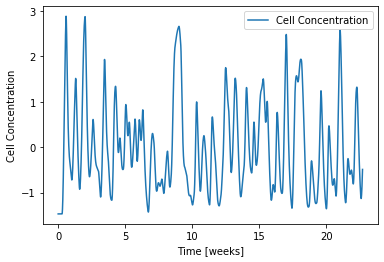

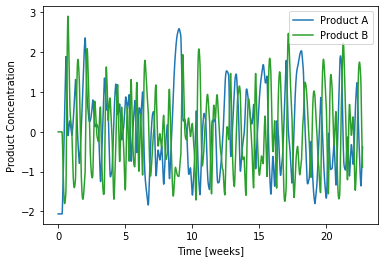

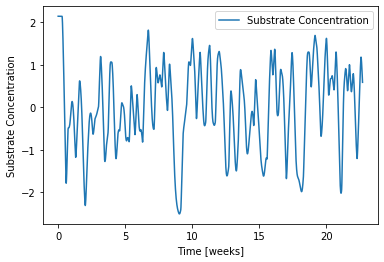

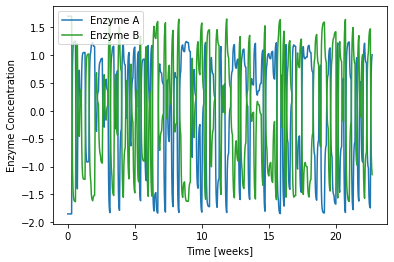

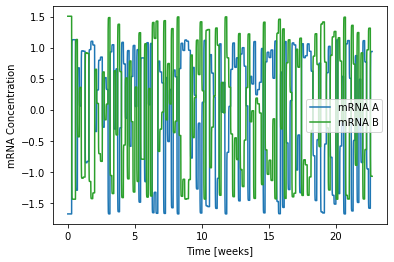

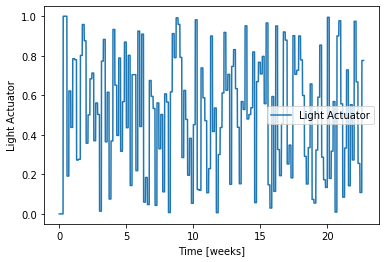

In [7]:
t_plot, X_plot, A_plot, B_plot, S_plot, \
E_A_plot, E_B_plot, R_A_plot, R_B_plot, u_plot = \
    t[1:,:].flatten() / (24 * 7), X_norm[1:,:].flatten(), \
    A_norm[1:,:].flatten(), B_norm[1:,:].flatten(), \
    S_norm[1:,:].flatten(), E_A_norm[1:,:].flatten(), \
    E_B_norm[1:,:].flatten(), R_A_norm[1:,:].flatten(), \
    R_B_norm[1:,:].flatten(), u[1:,:].flatten()

plt.figure()
plt.plot(t_plot, X_plot, c=blue, label = 'Cell Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Cell Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, A_plot, c=blue, label = 'Product A')
plt.plot(t_plot, B_plot, c=green, label = 'Product B')
plt.xlabel('Time [weeks]')
plt.ylabel('Product Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, S_plot, c=blue, label = 'Substrate Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Substrate Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, E_A_plot, c=blue, label = 'Enzyme A')
plt.plot(t_plot, E_B_plot, c=green, label = 'Enzyme B')
plt.xlabel('Time [weeks]')
plt.ylabel('Enzyme Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, R_A_plot, c=blue, label = 'mRNA A')
plt.plot(t_plot, R_B_plot, c=green, label = 'mRNA B')
plt.xlabel('Time [weeks]')
plt.ylabel('mRNA Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, u_plot, c=blue, label = 'Light Actuator')
plt.xlabel('Time [weeks]')
plt.ylabel('Light Actuator')
plt.legend()

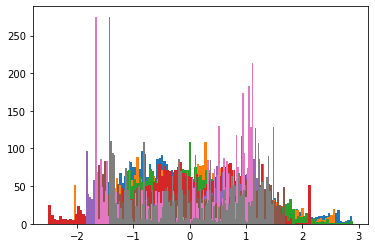

In [8]:
plt.figure()
_ = plt.hist(X_plot, bins=100)
_ = plt.hist(A_plot, bins=100)
_ = plt.hist(B_plot, bins=100)
_ = plt.hist(S_plot, bins=100)
_ = plt.hist(E_A_plot, bins=100)
_ = plt.hist(E_B_plot, bins=100)
_ = plt.hist(R_A_plot, bins=100)
_ = plt.hist(R_B_plot, bins=100)
# t_plot, X_plot, A_plot, B_plot, S_plot, \
# E_A_plot, E_B_plot, R_A_plot, R_B_plot, u_plot = \

In [9]:
time_embed = 10

# Training Set Size
ts_size = 1000
training_t = t[1:,:].flatten()[:ts_size]
h = t[1:,:].flatten()[1:ts_size] - t[1:,:].flatten()[:ts_size-1]
h = np.append(h,0)
training_set = np.array([X_norm[1:,:].flatten()[:ts_size], A_norm[1:,:].flatten()[:ts_size], 
                B_norm[1:,:].flatten()[:ts_size], S_norm[1:,:].flatten()[:ts_size],
                        u[1:,:].flatten()[:ts_size], h]).transpose()

test_t = t[1:,:].flatten()[ts_size:]
h = t[1:,:].flatten()[ts_size+1:] - t[1:,:].flatten()[ts_size:-1]
h_test = np.append(h,0)
test_set = np.array([X_norm[1:,:].flatten()[ts_size:], A_norm[1:,:].flatten()[ts_size:], 
                B_norm[1:,:].flatten()[ts_size:], S_norm[1:,:].flatten()[ts_size:],
                        u[1:,:].flatten()[ts_size:]]).transpose()

training_set_TE = training_set[:len(training_set)-(time_embed-1),:5]
for i in range(time_embed - 1):
    training_set_TE = np.append(training_set_TE,
                    training_set[i+1:len(training_set)-(time_embed-1)+i+1,:5], axis=1)
training_set_TE = np.append(training_set_TE,
                training_set[time_embed-1:,5].reshape((-1,1)), axis=1)

train_in = training_set_TE[:-1,:]
train_out = training_set[time_embed:,:-2]

print(h.shape)
print(test_set.shape)

(2815,)
(2816, 5)


In [10]:
importlib.reload(functions_Full)

HL = 7
HL_Nodes = 20
Activation = 'softplus'
learning_rate_pred = 1e-3 # default is 1e-3

print(train_in.shape)
RK4_model = functions_Full.RK4_Integrator_Model_TE_7(HL_Nodes, Activation, time_embed)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_pred)
RK4_model.build(train_in.shape)
RK4_model.compile(optimizer=optimizer,
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error
RK4_model.summary()

(990, 51)
Model: "r_k4__integrator__model_te_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1020      
_________________________________________________________________
dense_1 (Dense)              multiple                  420       
_________________________________________________________________
dense_2 (Dense)              multiple                  420       
_________________________________________________________________
dense_3 (Dense)              multiple                  420       
_________________________________________________________________
dense_4 (Dense)              multiple                  420       
_________________________________________________________________
dense_5 (Dense)              multiple                  420       
_________________________________________________________________
dense_6 (Dense)             

In [11]:
import kerasUtils
importlib.reload(kerasUtils)

Pbar = kerasUtils.Pbar
batch_size = ts_size
Epoch_Num = 10000
history = RK4_model.fit(train_in,train_out,
                          batch_size=batch_size,
                          validation_split=0.1,
                          epochs=Epoch_Num, verbose=False, shuffle=False, 
                          callbacks=[Pbar(Epoch_Num)]
                         )

Training: 100%|█████████▉| 9998/10000 [03:51<00:00, 43.62Epoch/s]

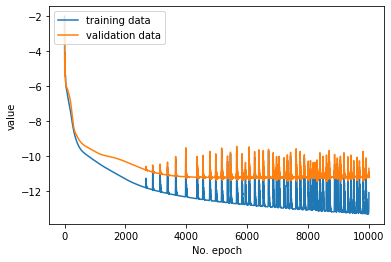

In [12]:
plt.plot(np.log(history.history['loss']), label='training data')
plt.plot(np.log(history.history['val_loss']), label='validation data')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [13]:
from tqdm import tqdm
index = -1

pred_offline = np.zeros(np.shape(test_set))
pred_offline[0:time_embed,:] = test_set[0:time_embed,:]
pred_offline[:,-1:] = test_set[:,-1:]

pbar = tqdm(total=np.shape(test_set)[0] - 1, position=0, leave=True)

for i in range(np.shape(test_set)[0] - time_embed):
    pbar.update()
    input = pred_offline[i:i+time_embed,:].reshape(1,-1)
    input = np.append(input, h_test[i+time_embed]).reshape(1,-1)
    output = RK4_model.predict(input)
    pred_offline[i+time_embed,:-1] = output
    

100%|█████████▉| 2806/2815 [00:48<00:00, 58.91it/s], 43.62Epoch/s]

Text(0, 0.5, 'Light')

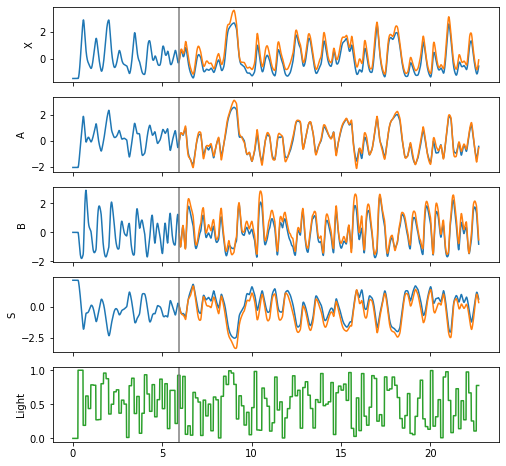

In [14]:
plottill = -1

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=False, figsize=(8,8))
ax1.plot(training_t / (24*7), training_set[:,0], c=blue)
ax1.plot(test_t[:plottill] / (24*7), test_set[:plottill,0], c=blue)
ax1.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,0], c=red)
ax1.axvline(x=test_t[0] / (24*7),c=black)
ax1.set_ylabel('X')

ax2.plot(training_t / (24*7), training_set[:,1], c=blue)
ax2.plot(test_t[:plottill] / (24*7), test_set[:plottill,1], c=blue)
ax2.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,1], c=red)
ax2.axvline(x=test_t[0] / (24*7),c=black)
ax2.set_ylabel('A')

ax3.plot(training_t / (24*7), training_set[:,2], c=blue)
ax3.plot(test_t[:plottill] / (24*7), test_set[:plottill,2], c=blue)
ax3.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,2], c=red)
ax3.axvline(x=test_t[0] / (24*7),c=black)
ax3.set_ylabel('B')

ax4.plot(training_t / (24*7), training_set[:,3], c=blue)
ax4.plot(test_t[:plottill] / (24*7), test_set[:plottill,3], c=blue)
ax4.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,3], c=red)
ax4.axvline(x=test_t[0] / (24*7),c=black)
ax4.set_ylabel('S')

ax5.plot(training_t / (24*7), training_set[:,4], c=green)
ax5.plot(test_t[:plottill] / (24*7), test_set[:plottill,4], c=green)
ax5.axvline(x=test_t[0] / (24*7),c=black)
ax5.set_ylabel('Light')


In [15]:
from tqdm import tqdm

pred_online = np.zeros(np.shape(test_set))
pred_online[0:time_embed,:] = test_set[0:time_embed,:]
pred_online[:,-1:] = test_set[:,-1:]

pbar = tqdm(total=np.shape(test_set)[0] - 1, position=0, leave=True)

for i in range(np.shape(test_set)[0] - time_embed):
    pbar.update()
    input = test_set[i:i+time_embed,:].reshape(1,-1)
    input = np.append(input, h_test[i+time_embed]).reshape(1,-1)
    output = RK4_model.predict(input)
    pred_online[i+time_embed,:-1] = output

100%|█████████▉| 2805/2815 [00:48<00:00, 54.31it/s]

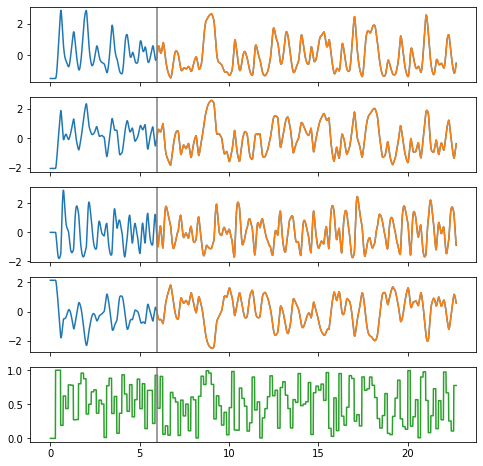

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=False, figsize=(8,8))
ax1.plot(training_t / (24*7), training_set[:,0], c=blue)
ax1.plot(test_t / (24*7), test_set[:,0], c=blue)
ax1.plot(test_t / (24*7), pred_online[:,0], c=red)
ax1.axvline(x=test_t[0] / (24*7),c=black)

ax2.plot(training_t / (24*7), training_set[:,1], c=blue)
ax2.plot(test_t / (24*7), test_set[:,1], c=blue)
ax2.plot(test_t / (24*7), pred_online[:,1], c=red)
ax2.axvline(x=test_t[0] / (24*7),c=black)

ax3.plot(training_t / (24*7), training_set[:,2], c=blue)
ax3.plot(test_t / (24*7), test_set[:,2], c=blue)
ax3.plot(test_t / (24*7), pred_online[:,2], c=red)
ax3.axvline(x=test_t[0] / (24*7),c=black)

ax4.plot(training_t / (24*7), training_set[:,3], c=blue)
ax4.plot(test_t / (24*7), test_set[:,3], c=blue)
ax4.plot(test_t / (24*7), pred_online[:,3], c=red)
ax4.axvline(x=test_t[0] / (24*7),c=black)

ax5.plot(training_t / (24*7), training_set[:,4], c=green)
ax5.plot(test_t / (24*7), test_set[:,4], c=green)
ax5.axvline(x=test_t[0] / (24*7),c=black)

In [24]:
from scipy.interpolate import interp1d

ANN1 = RK4_model.ANN1
ANN2 = RK4_model.ANN2
ANN3 = RK4_model.ANN3
ANN4 = RK4_model.ANN4
ANN5 = RK4_model.ANN5
ANN6 = RK4_model.ANN6
ANN7 = RK4_model.ANN7
ANNout = RK4_model.ANNout

inputs = tf.keras.Input(shape=(time_embed*5,))
x = ANN7(inputs)
x = ANN6(x)
x = ANN5(x)
x = ANN4(x)
x = ANN3(x)
x = ANN2(x)
x = ANN1(x)
outputs = ANNout(x)

odeModel = tf.keras.Model(inputs=inputs, outputs=outputs)

my_h = h[0]

pred_ODE = np.zeros(np.shape(test_set))
pred_ODE[0:time_embed+1,:] = test_set[0:time_embed+1,:]
pred_ODE[:,-1:] = test_set[:,-1:]

def myANN_ODE(t, inputs, u):
    t_history = np.arange(t-my_h,t-my_h*time_embed,-my_h)
    interp = interp1d(test_t, pred_ODE, axis=0)
    history = interp(t_history).flatten()
    argument = np.append(history, inputs, axis=0)
    argument = np.append(argument, [u], axis=0).reshape((1,-1))
    output = odeModel.predict(argument)
    return output.reshape(4)

indexes = np.unique(test_set[:,-1], return_index=True)[1]
u_arr = [test_set[index,-1] for index in sorted(indexes)]
t_arr = [test_t[index] for index in sorted(indexes)]

print(test_set.shape)
print(test_t.shape)
print(len(u_arr))
print(len(t_arr))



(2816, 5)
(2816,)
118
118


In [25]:
from scipy.integrate import solve_ivp
from tqdm import tqdm

init = pred_ODE[time_embed,:-1]

pbar = tqdm(total=len(test_t) - time_embed, position=0, leave=True)
for j in range(len(test_t) - time_embed - 1):
    init = pred_ODE[j+time_embed,:-1]
    pbar.update()
    sol = solve_ivp(myANN_ODE, [test_t[j+time_embed], test_t[j+time_embed+1]], init, 
                    t_eval=[test_t[j+time_embed+1]], 
              args=[pred_ODE[j+time_embed+1,-1]], method='BDF')
    pred_ODE[j+time_embed+1,:-1] = sol.y.flatten()

100%|█████████▉| 2805/2806 [24:40<00:00,  1.34it/s]

In [ ]:
# j = 3890
# print(j)
# print(len(test_t))
# sol2 = solve_ivp(myANN_ODE, [test_t[j+time_embed-1], test_t[j+time_embed]], init, t_eval=[test_t[j+time_embed]], 
#               args=[pred_ODE[j+time_embed,-1]], method='BDF')

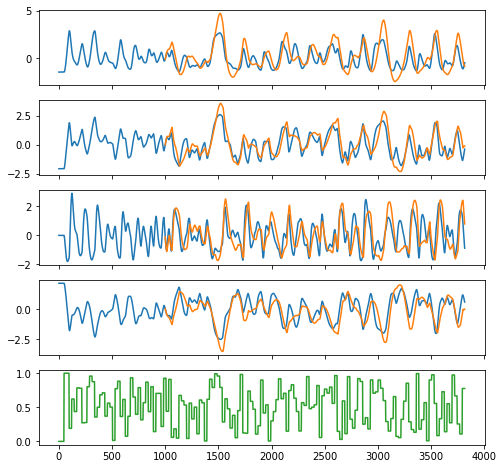

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=False, figsize=(8,8))
ax1.plot(training_t, training_set[:,0], c=blue)
ax1.plot(test_t, test_set[:,0], c=blue)
ax1.plot(test_t, pred_ODE[:,0], c=red)

ax2.plot(training_t, training_set[:,1], c=blue)
ax2.plot(test_t, test_set[:,1], c=blue)
ax2.plot(test_t, pred_ODE[:,1], c=red)

ax3.plot(training_t, training_set[:,2], c=blue)
ax3.plot(test_t, test_set[:,2], c=blue)
ax3.plot(test_t, pred_ODE[:,2], c=red)

ax4.plot(training_t, training_set[:,3], c=blue)
ax4.plot(test_t, test_set[:,3], c=blue)
ax4.plot(test_t, pred_ODE[:,3], c=red)

ax5.plot(training_t, training_set[:,4], c=green)
ax5.plot(test_t, test_set[:,4], c=green)